In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('ticks')

import glob
import re
import json 
import itertools
import functools 
import pickle

mpl.rc('font', family='Arial', size=14)

In [2]:
sample_extractor = re.compile('/([^/]+)\.matrix')

In [3]:
def ucsc_index(df):
    return df.chr.str.cat(df.start.astype(str).str.cat(df.end.astype(str).str.cat(df.strand.astype(str), sep=';'), sep='-'), sep=':')

def read_full_file(f):
    temp = pd.read_csv(f, compression='gzip', comment='@', sep='\t', header=None)
    #temp = temp[temp.iloc[:, 5] != '.']  #this removes all rows where peak strand is '.' i.e. intergenic peaks
    # Generate a UCSC style description of the peak coordinates
    ucsc_idx = (temp.iloc[:, 0].str.cat(
                    temp.iloc[:, 1].astype(str).str.cat(
                        temp.iloc[:, 2].astype(str).str.cat( 
                            temp.iloc[:, 5].astype(str), sep = ';'),
                    sep= '-'), 
                sep=':'))
    # Drop the first 6 columns, which here act as a descriptor
    return temp.set_index(ucsc_idx).drop(range(6), axis=1).fillna(0)

In [4]:
mat_hepa = glob.glob('repeats_mouse_mm9/hepa_rep/*.matrix')
filename_correspondence_hepa = {i: sample_extractor.findall(i)[0] for i in mat_hepa}

In [5]:
#dict containing genic and intergnic peaks
hepa = {}

for filename, samplename in filename_correspondence_hepa.items():
    print(samplename)
    hepa[samplename] = read_full_file(filename)
    

GQ.sh1_scale
APR.sh4
Z.peak_scale_bin75
STR.peak_scale
STR.sh1
STR.peak
APR.peak_100
GQ.sh5
Z.sh2
DR.sh4
STR.sh3
IR.sh5
GQ.peak_scale
STR.sh1_scale
MR.sh4
Z.peak_100
MR.sh1_scale
IR.sh1
APR.sh1_scale
MR.peak_100
Z.sh2_scale
STR.peak_scale_bin75
GQ.sh1
APR.sh2
MR.peak
GQ.peak
Z.peak
MR.sh2
IR.peak_scale
DR.peak_scale
STR.sh5
DR.sh2
IR.sh1_scale
GQ.peak_scale_bin75
IR.sh3
GQ.sh3
DR.sh2_scale
Z.sh4
IR.peak_100
Z.sh1
Z.sh1_scale
MR.sh2_scale
APR.sh2_scale
APR.sh5
IR.peak
Z.peak_scale
APR.peak_scale
MR.sh5
APR.peak_scale_bin75
STR.sh2
GQ.peak_100
DR.sh5
DR.peak_scale_bin75
DR.sh1_scale
IR.sh4
GQ.sh4
Z.sh3
IR.sh2_scale
IR.peak_scale_bin75
APR.sh3
MR.peak_scale
GQ.sh2_scale
MR.sh1
DR.peak_100
MR.peak_scale_bin75
APR.peak
DR.sh1
GQ.sh2
Z.sh5
DR.sh3
STR.sh4
IR.sh2
DR.peak
STR.peak_100
STR.sh2_scale
MR.sh3
APR.sh1


In [7]:
mat_liver = glob.glob('repeats_mouse_mm9/liver_rep/*.matrix')
filename_correspondence_liver = {i: sample_extractor.findall(i)[0] for i in mat_liver}

#dict containing genic and intergnic peaks
liver = {}

for filename, samplename in filename_correspondence_liver.items():
    print(samplename)
    liver[samplename] = read_full_file(filename)


APR.sh4
STR.sh1
STR.peak
GQ.sh5
Z.sh2
DR.sh4
STR.sh3
IR.sh5
MR.sh4
IR.sh1
GQ.sh1
APR.sh2
MR.peak
GQ.peak
Z.peak
MR.sh2
STR.sh5
DR.sh2
IR.sh3
GQ.sh3
Z.sh4
Z.sh1
APR.sh5
IR.peak
MR.sh5
STR.sh2
DR.sh5
IR.sh4
GQ.sh4
Z.sh3
APR.sh3
MR.sh1
APR.peak
DR.sh1
GQ.sh2
Z.sh5
DR.sh3
STR.sh4
IR.sh2
DR.peak
MR.sh3
APR.sh1


In [8]:
mat_e14 = glob.glob('repeats_mouse_mm9/e14_rep/*.matrix')
filename_correspondence_e14 = {i: sample_extractor.findall(i)[0] for i in mat_e14}

#dict containing genic and intergnic peaks
e14 = {}

for filename, samplename in filename_correspondence_e14.items():
    print(samplename)
    e14[samplename] = read_full_file(filename)
    

APR.sh4
STR.sh1
STR.peak
GQ.sh5
Z.sh2
DR.sh4
STR.sh3
IR.sh5
MR.sh4
IR.sh1
GQ.sh1
APR.sh2
MR.peak
GQ.peak
Z.peak
MR.sh2
STR.sh5
DR.sh2
IR.sh3
GQ.sh3
Z.sh4
Z.sh1
APR.sh5
IR.peak
MR.sh5
STR.sh2
DR.sh5
IR.sh4
GQ.sh4
Z.sh3
APR.sh3
MR.sh1
APR.peak
DR.sh1
GQ.sh2
Z.sh5
DR.sh3
STR.sh4
IR.sh2
DR.peak
MR.sh3
APR.sh1


In [9]:
mat_t3 = glob.glob('t3_rep/*.matrix')
filename_correspondence_t3 = {i: sample_extractor.findall(i)[0] for i in mat_t3}

#dict containing genic and intergnic peaks
t3 = {}

for filename, samplename in filename_correspondence_t3.items():
    print(samplename)
    t3[samplename] = read_full_file(filename)
    

APR.sh4
STR.sh1
STR.peak
GQ.sh5
Z.sh2
DR.sh4
STR.sh3
IR.sh5
MR.sh4
IR.sh1
GQ.sh1
APR.sh2
MR.peak
GQ.peak
Z.peak
MR.sh2
STR.sh5
DR.sh2
IR.sh3
GQ.sh3
Z.sh4
Z.sh1
APR.sh5
IR.peak
MR.sh5
STR.sh2
DR.sh5
IR.sh4
GQ.sh4
Z.sh3
APR.sh3
MR.sh1
APR.peak
DR.sh1
GQ.sh2
Z.sh5
DR.sh3
STR.sh4
IR.sh2
DR.peak
MR.sh3
APR.sh1


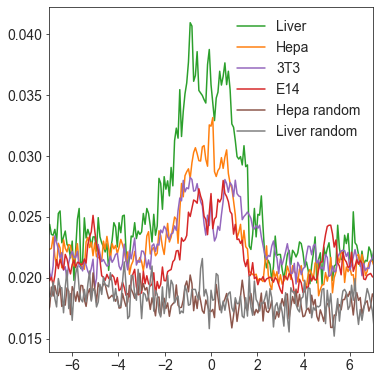

In [15]:
fig, ax = plt.subplots(ncols =1, nrows=1, figsize=(5.5,5.5))

X = np.arange(-7.5,7.5,0.075)
a= t3['GQ.peak'].loc[(t3['GQ.peak'].mean(axis=1) < t3['GQ.peak'].mean(axis=1).quantile(0.99)),:].mean(axis=0)
b= e14['GQ.peak'].loc[(e14['GQ.peak'].mean(axis=1) < e14['GQ.peak'].mean(axis=1).quantile(0.99)),:].mean(axis=0)
c= liver['GQ.peak'].loc[(liver['GQ.peak'].mean(axis=1) < liver['GQ.peak'].mean(axis=1).quantile(0.99)),:].mean(axis=0)
d= hepa['GQ.peak'].loc[(hepa['GQ.peak'].mean(axis=1) < hepa['GQ.peak'].mean(axis=1).quantile(0.99)),:].mean(axis=0)
e= hepa['GQ.sh1'].loc[(hepa['GQ.sh1'].mean(axis=1) < hepa['GQ.sh1'].mean(axis=1).quantile(0.99)),:].mean(axis=0)
f= liver['GQ.sh1'].loc[(liver['GQ.sh1'].mean(axis=1) < liver['GQ.sh1'].mean(axis=1).quantile(0.99)),:].mean(axis=0)

palette_tab10 = sns.color_palette("tab10", 10)

ax.set_xlim(-7, 7)
ax.set_xlabel('')
ax.set_ylabel('')


ax.plot(X, c, color = palette_tab10[2], label = 'Liver')
ax.plot(X, d, color = palette_tab10[1], label = 'Hepa' )
ax.plot(X, a, color = palette_tab10[4], label = '3T3' )
ax.plot(X, b, color =palette_tab10[3], label = 'E14')

ax.plot(X, e, color =palette_tab10[5], label = 'Hepa random')
ax.plot(X, f, color =palette_tab10[7], label = 'Liver random')
ax.legend(frameon=False)


fig.tight_layout()
#fig.savefig('G4.svg')
